# Introduction

Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain.

<br>

__Classifiers__ are divided into: 
- __Generative__: A generative model would have the goal of understanding what dogs look like and what cats look like. You might literally ask such a model to ‘generate’, i.e. draw, a dog. Given a test image, the system then asks whether it’s the cat model or the dog model that better fits (is less surprised by) the image, and chooses that as its label.
- __Disriminative__: A discriminative model, by contrast, is only trying to learn to distinguish the classes (perhaps without learning much about them). So maybe all the dogs in the training data are wearing collars and the cats aren’t. If that one feature neatly separates the classes, the model is satisfied. If you ask such a model what it knows about cats all it can say is that they don’t wear collars.

<br>

__Decision Boundaries__

<br>


<img src="./figs/boundaries.png" alt="Decision Boundaries" width="400px"> 
<p style="text-align: center;">     
    <b>Figure:</b> <i>Linear</i> Decision Boundary (left) and <i>non-linear</i> Decision Boundary(right).    
</p>    




## Outline
- Classification: the sigmoid 
- Logistic Regression Model/Activation Functions
- Hypothesis Function
- Cost Function (Cross-Entropy Loss/Cost function)
- Stochastic Gradient Descent


# Logistic Regression
<div style="text-align: justify">
<b>Logistic regression</b> is a <i>supervised learning</i> algorithm used for <b>classification</b> purposes. It is a probabilistic model that classifies the instances in terms of probabilities. It measures the relationship between the categorical dependent variable ($y$) and one or more independent variables ($\mathbf{x}$) by estimating probabilities using a logistic function, which is the cumulative distribution function of logistic distribution.
</div>
\begin{equation}
 \mathbf{X} = \begin{bmatrix}
 x_1^1 & x_2^1 & \dots & x_n^1\\
 x_1^2 & x_2^2 & \dots & x_n^2\\
 \vdots &  & \ddots & \vdots\\
 x_1^m & x_2^m & \dots & x_n^m\\
 \end{bmatrix}
 \quad and \quad
 \mathbf{y} = \begin{bmatrix}
 y^1\\
 y^2\\
 \vdots\\
 y^m
 \end{bmatrix}
\end{equation}




__Important Quotes:__
- _Jurafsky & Martin_, 2019. Logistic regression is one of the most important analytic tools in the social and natural sciences. In natural language processing, logistic regression is the <u>baseline</u> supervised machine learning algorithm or classification, and also has a very close relationship with neural networks.




Note: Logistic Regression is a classification algorithm (or classifier), for historical reasons it is named in this way and contains the word <u>regression</u>. 

__Classification task examples:__
- <u>Email</u>: Spam/Not Spam?
- <u>Online Transactions</u>: Fraudulent (yes/no)?
- <u>Tumor</u>: Malignant/Benign?


- The independent variable $\mathbf{X}$ is an $m\times n$ matrix, where each $i^{th}$_row_ corresponds to the $i^{th}$ sample and $j^{th}$_column_ corresponds to the $j^{th}$ feature (e.g. area of a house).
- The dependent variable $\mathbf{y}$ is an $m$-_sized_ vector, where $i^{th}$ _element_ corresponds to the <u>class</u> of the $i^{th}$ _sample_, where $y^i\in\{0,1\}$.



Logistic Regression is a _probabilistic_ classifier that makes use of supervised machine learning. Hence, logistic regression, as any supervised learning classifiers, requires a training set of _m_-samples ($x^i,y^i$). It is commonly applied to all sorts of NLP tasks, and any property
of the input can be a feature. 

__Hypothesis function presentation__

The goal of binary logistic regression is to train a classifier that can make a binary decision about the class of a new input observation. Here we introduce the sigmoid classifier that will help us make this decision.

\begin{equation}
0\leq h_\Theta(x)\leq 1
\end{equation}

Thus, we are going to use a function with a bounded output: $(0,1)$. The __sigmoid__ (or __logistic__) function takes real values as an input and maps them to the bounded range. It's equation and graph is given below:
<br><br>
\begin{equation}
g(z)=\frac{1}{1+e^{-z}}
\end{equation}<img src="./figs/sigmoid.gif"  style="float: inline;">

where:

\begin{equation}
z = \Theta^T  X
\end{equation}

The sigmoid function belongs to the __activation functions__.

__Cost Function__

_Cross-entropy_ loss, or log loss, measures the performance of a classifier (a.k.a classification model) whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. A perfect model would have a log loss of 0.

\begin{equation}
J(\Theta)=\frac{1}{m} \sum_{i=1}^{m}[y^i\log h_\Theta(x^i)+(1-y^i)\log(1-h_\Theta(x^i))]
\end{equation}

The cross entropy partial derivatives with respect to $\theta_{0,\dots,n}$ are given through:

\begin{equation}
\frac{\partial}{\partial \theta_j}J(\Theta)= \frac{1}{m}\sum_{i=1}^{m}(h_\Theta(x^i)-y^i)x_j^i
\end{equation}


We can measure the accuracy of our hypothesis function by using a cost function. This takes an average (actually a fancier version of an average) of all the results of the hypothesis with inputs from  𝐱𝑖  compared to the actual output  𝐲𝑖 .

To define the optimum parameters  $\theta_0$ and $\theta_1$, it is necessary to use a metric as to quantify how well our hypothesis function fits the data; the cost function. The equation is given below:





In [1]:
# import libraries
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
import sys
sys.path.append('./exercise/')
import logistic_regression as lr 

In [2]:
# import Data
data = np.loadtxt('./data/multivariate_logistic_regression.txt',delimiter=',')
X,y = data[:,0:2],data[:,2]

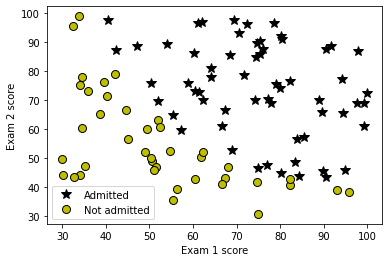

In [3]:
# plot Data
pos = y == 1
neg = y == 0

plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

# add axes labels
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])

## 1.1 Logistic Regression Using Scikit-learn

In [4]:
from sklearn import linear_model,metrics


Accuracy:  0.87
theta (parameters):  [[-3.9000297   0.03844761  0.03102019]]
Mean squared error:  0.13
Coefficient of determination:  0.45833333333333337


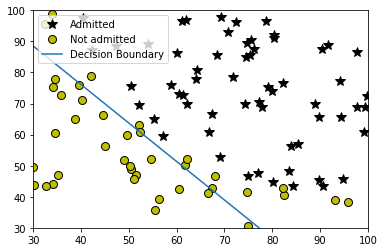

In [5]:
# add columns with ones
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1) # other way to add a column of ones

# initialize logistic regression model
regr = linear_model.LogisticRegression(fit_intercept=False,max_iter=1000)

# train the model using training set
regr.fit(X,y)

# make predictions using the testing set
y_pred = regr.predict(X)

# classification accuracy
print("Accuracy: ",regr.score(X, y))

# theta's
print("theta (parameters): ",regr.coef_)

# mean squared error
print('Mean squared error: ', metrics.mean_squared_error(y, y_pred))

# coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', metrics.r2_score(y,y_pred))

# Plot Boundary
theta = np.squeeze(regr.coef_)
lr.plotDecisionBoundary(lr.plotData, theta, X, y)


## 2. Logistic Regression using our own library

In [6]:
import numpy as np
from scipy import optimize
import sys
sys.path.append('./exercise/')
import logistic_regression as lr

In [7]:
# import Data
data = np.loadtxt('./data/multivariate_logistic_regression.txt',delimiter=',')
X,y = data[:,0:2],data[:,2]

# add columns with ones
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1) # other way to add a column of ones

In [8]:
# Implement sigmoid function
z = 0 
g = lr.sigmoid(z)
print('g(',z,')=',g)

g( 0 )= 0.5


In [9]:
# Compute Cost
theta = np.zeros(X.shape[1])
cost, grad = lr.costFunction(theta,X,y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')


# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = lr.costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


In [10]:
options= {'maxiter': 400}
res = optimize.minimize(lr.costFunction,
                        theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

In [11]:
# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


In [12]:
# Compute accuracy on our training set
p = lr.predict(theta, X)

print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')


Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


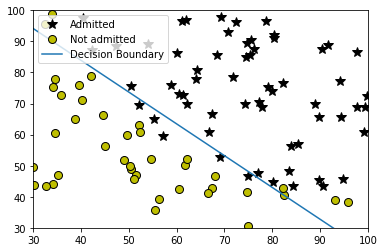

In [13]:
# Plot Boundary
lr.plotDecisionBoundary(lr.plotData, theta, X, y)

In [14]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = lr.sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002



# References
1. Logistic Regression Definition:<br>https://en.wikipedia.org/wiki/Logistic_regression
2. Machine Learning (Coursera), Andrew Ng<br>
https://www.coursera.org/learn/machine-learning
3. Speech Language Processing, Daniel Jurafsky & James H. Martin.<br>https://web.stanford.edu/~jurafsky/slp3/5.pdf
4. Neural Networks and Deep Learning: A textbook, Ch. Aggarwal
